This notebook serves as an example of using the imshow function from matplotlib to visualize a picture, and to perform basic manipulations of the figure using functions to automatically perform interpolation.

The imshow function from matplotlib takes a two dimensional array, and creates a heatmap from it. Heat in this sense is the value in each entry of the array being put into the imshow function. Coordinates are graphed according to their "pixel" placement in the chosen array. For example, an array with the value 5 in its [2,3] position will show up in the imshow as a square with heat value 5 at position (2,3).

In this example, we will create a two dimensional ellipse with a given center (xcent, ycent), radius along the horizontal axis a, and radius along the vertical axis b. Each point on the ellipse will have a heat value of 1 for simplicity. The ellipse will be in a box of size width x width, and pixel size N x N. After this, we will perform a few basic tranformations on the ellipse, using functions that handle spline interpolation automatically.

In [2]:
import numpy
import matplotlib.pyplot

In [17]:
# Creating an ellipse with center (xcent, ycent), in a box of size width x width, pixel size N x N, horizontal
# radius a, vertical radius b, filled with heat values of 1.
N= 1200
width= 10
a= 2
b= 1.5
x= numpy.linspace(-width/2, width/2, N)
# this function creates x and y grids that we can input into functions and behave just like defining a function of x and y
x, y= numpy.meshgrid(x, x)
xcent= 1.57
ycent= 1.2
ellipse= numpy.sqrt(numpy.power((x-xcent)/a, 2)+numpy.power((y-ycent)/b, 2))<=1
ellipse= ellipse*1

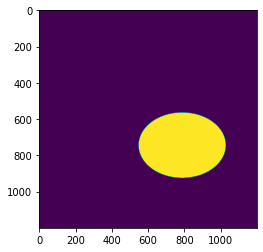

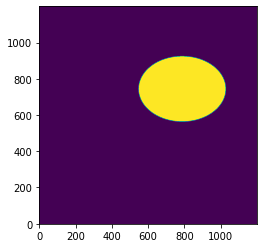

In [18]:
# By default, imshow has its vertical direction start pixels from the top and go down.
matplotlib.pyplot.imshow(ellipse)
matplotlib.pyplot.show()
# To fix this, we adjust the origin of the imshow
matplotlib.pyplot.imshow(ellipse, origin= 'lower')
matplotlib.pyplot.show()

In [19]:
# To manipulate our image with automatic spline interpolation, we will use commands from the scipy nd(imensional)image
# library
from scipy import ndimage

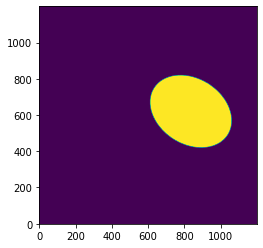

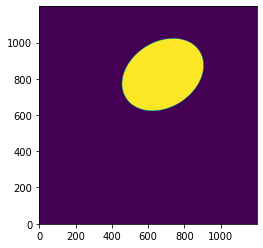

In [20]:
# the command ndimage.rotate rotates the entries of an array some given amount of degrees.
# here, we use optional parameters specifying the order of the spline interpolation and if reshaping of the input matrix
# is allowed
ellipse2= ndimage.rotate(ellipse, 32.5, reshape= False, order= 1)
matplotlib.pyplot.imshow(ellipse2, origin= 'lower')
matplotlib.pyplot.show()
# Since we were using an altered origin for our imshow, this appears to rotate in the opposite direction that we specified.
# to fix this, we can just rotate by a negative angle
ellipse3= ndimage.rotate(ellipse, -32.5, reshape= False, order= 1)
matplotlib.pyplot.imshow(ellipse3, origin= 'lower')
matplotlib.pyplot.show()
# Note that the origin is the middle pixel of the imshow diagram.

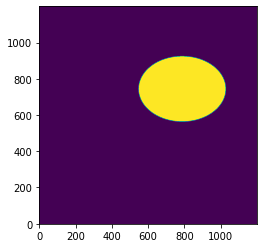

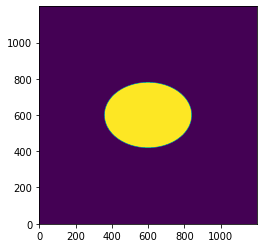

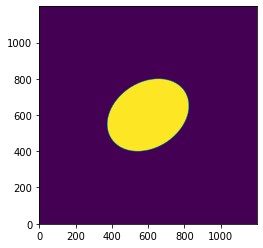

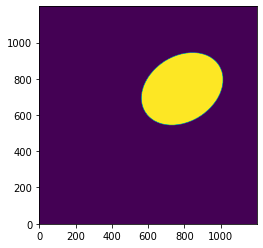

In [28]:
# The command ndimage.shift translates the image by whole or fractional pixel amounts, similarly to ndimage.rotate.
# Here, we will shift the ellipse to have its center at the origin.
matplotlib.pyplot.imshow(ellipse, origin= 'lower')
matplotlib.pyplot.show()
xrollamount= xcent
yrollamount= ycent
xroll= xrollamount*N/width
yroll= yrollamount*N/width
ellipse3= ndimage.shift(ellipse, (-yroll, -xroll), order= 1)
matplotlib.pyplot.imshow(ellipse3, origin= 'lower')
matplotlib.pyplot.show()
# Now that the ellipse is at the origin, we can easily perform actions like rotations just on the ellipse and taking
# it back to where it started.
ellipse4= ndimage.rotate(ellipse3, -32.5, reshape= False, order= 1)
matplotlib.pyplot.imshow(ellipse4, origin= 'lower')
matplotlib.pyplot.show()
ellipse5= ndimage.shift(ellipse4, (yroll, xroll), order= 1)
matplotlib.pyplot.imshow(ellipse5, origin= 'lower')
matplotlib.pyplot.show()
# There are other useful commands, such as numpy.flip, which can flip all entries in an array around some axis.